In [2]:
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_validate,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
# from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from typing import Literal
from scipy import stats
# import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import joblib
import os

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')

### Loading Datasets

In [3]:
x_train=pd.read_csv('./Train/X_Train_Data_Input.csv',index_col='ID')
y_train=pd.read_csv('./Train/Y_Train_Data_Target.csv',index_col='ID')
x_test=pd.read_csv('./Test/X_Test_Data_Input.csv',index_col='ID')
y_test=pd.read_csv('./Test/Y_Test_Data_Target.csv',index_col='ID')

FileNotFoundError: [Errno 2] No such file or directory: './Train/X_Train_Data_Input.csv'

In [8]:
x_train.info()

NameError: name 'x_train' is not defined

In [4]:
x_train.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
ID,,,,,,,,,,,,,,,,,,,,,,
ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,NaN,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,NaN,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,NaN,1,1,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,0.0,0,0.0,0,0,0


In [13]:
m,d=x_train.shape
print(f'The rows in the training set are {m} and the columns are {d}')

The rows in the training set are 785133 and the columns are 22


In [14]:
m1,d1=x_test.shape
print(f'The rows in the training set are {m1} and the columns are {d1}')

The rows in the training set are 261712 and the columns are 22


### EDA (Exploratory Data Analysis)

#### Creating Exploratory Dataset
Since the dataset is really large we take a small representative sample for EDA.

In [15]:
x_eda,_,y_eda,_=train_test_split(x_train,y_train,test_size=0.8,random_state=42,stratify=y_train)

In [8]:
print(', '.join(x_eda.columns.to_list()))

Column0, Column1, Column2, Column3, Column4, Column5, Column6, Column7, Column8, Column9, Column10, Column11, Column12, Column13, Column14, Column15, Column16, Column17, Column18, Column19, Column20, Column21


In [7]:
x_eda.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
ID,,,,,,,,,,,,,,,,,,,,,,
07119f8ced917651a28465d89d11ff6b,1.0,2495,1865.0,0.452580,0.488309,-0.007469,-0.407939,-0.015607,-0.774979,NaN,1,1,1,1,NaN,0.003390,0.0,0,0.0,0,0,0
4ca387468f72adb7bcc51447664077c1,0.0,0,3892.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,NaN,0.0,0,1.0,0,0,0
817e1b797a7bb94582415a36210d90fe,0.0,1226,4501.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.495097,NaN,1,1,1,1,0.001351,0.003390,0.0,0,0.0,0,0,0
23809cb1ff8d01527a27da7acc1d27b4,0.0,1012,3614.0,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,NaN,1,1,1,1,-0.000124,0.003391,0.0,0,0.0,0,0,0
a411d992d495243cce7a4f98f2fe7b1c,0.0,2,4319.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.003390,0.0,0,0.0,0,0,0


Check whether dataset is `balanced` or `unbalanced`

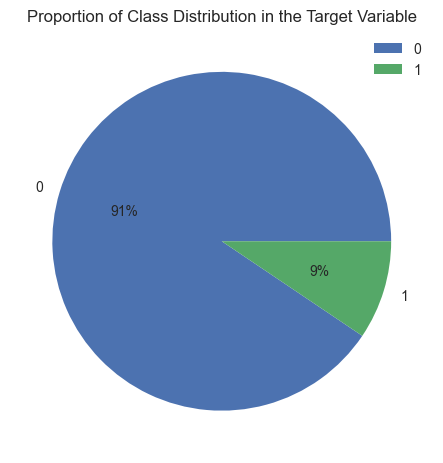

In [7]:
plt.pie(y_eda.value_counts(normalize=True),labels=[0,1],autopct='%.0f%%');
plt.title("Proportion of Class Distribution in the Target Variable");
plt.legend()
plt.show()

#### Univariate Analysis

Histograms

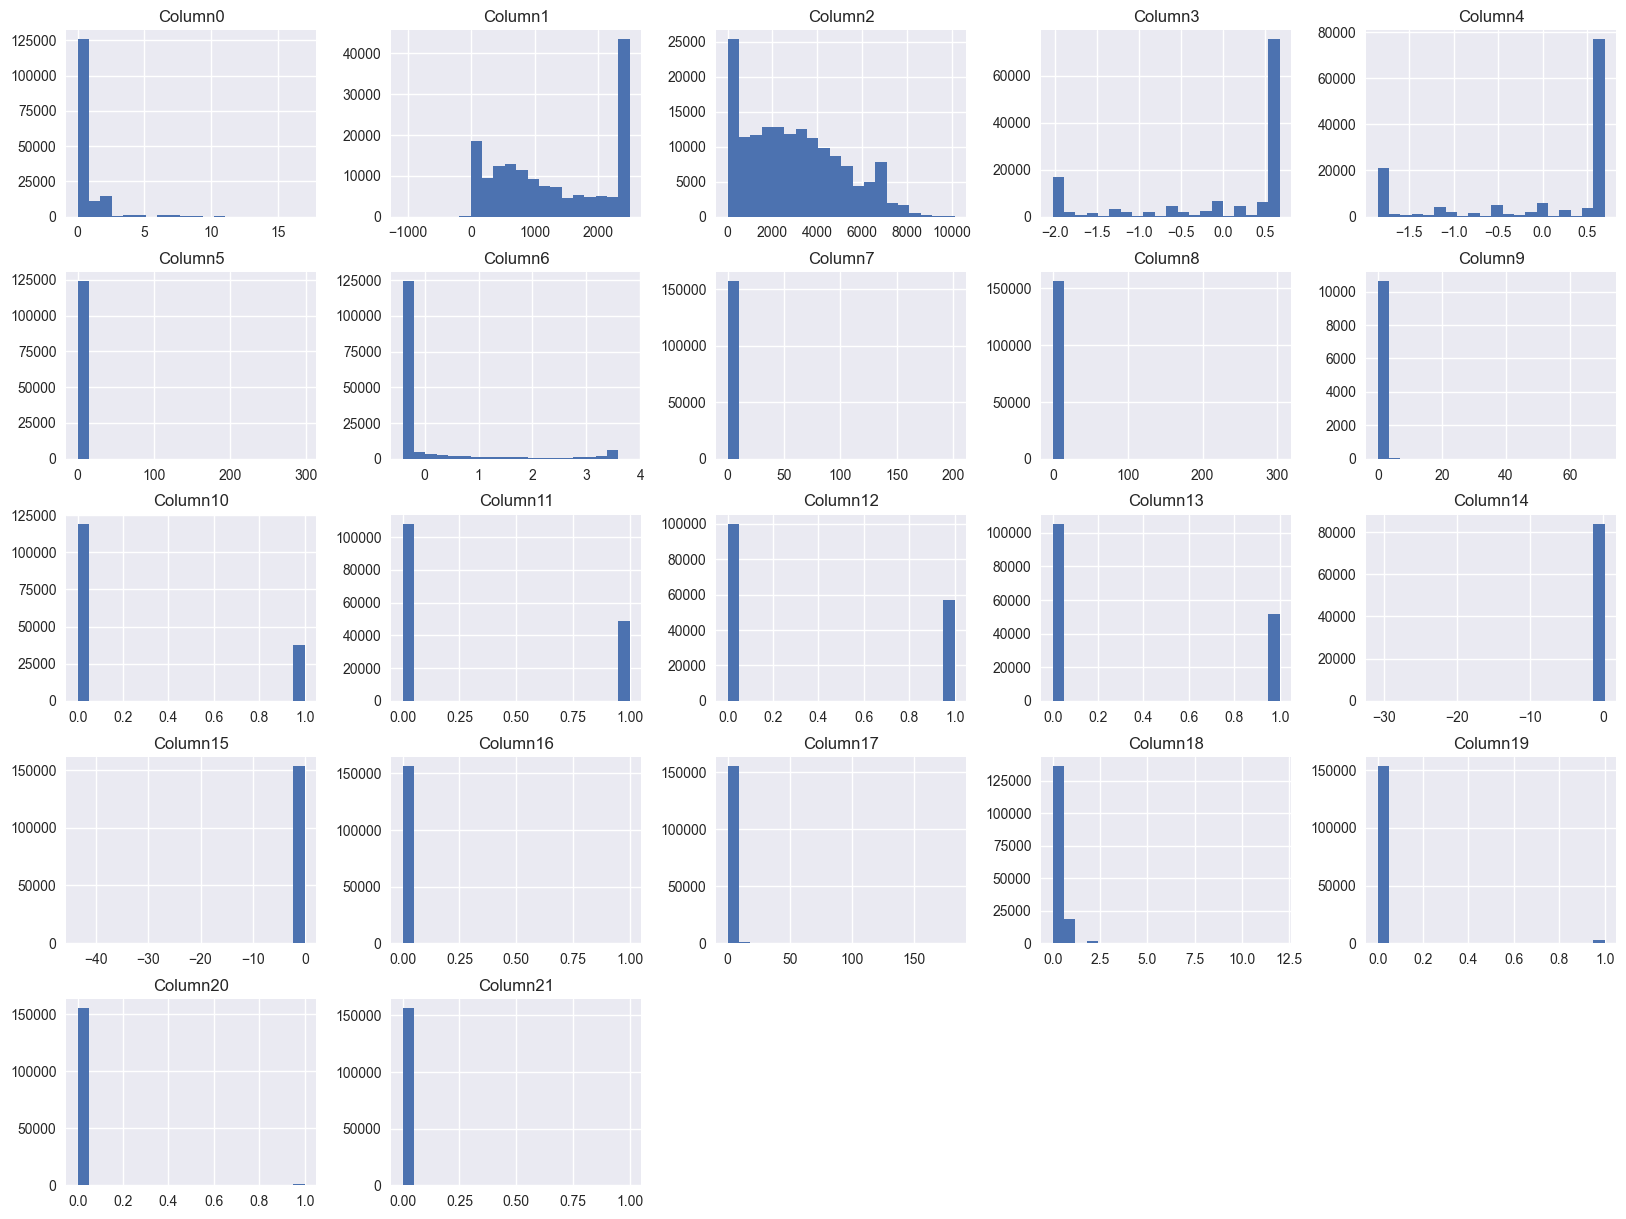

In [9]:
x_eda.hist(bins=20,figsize=(20,15));

Number of unique values in each column

In [10]:
for col in x_eda.columns:
    print(f'{col} has {len(x_eda[col].unique())} unique values')

Column0 has 18 unique values
Column1 has 2535 unique values
Column2 has 8570 unique values
Column3 has 48 unique values
Column4 has 48 unique values
Column5 has 37245 unique values
Column6 has 37743 unique values
Column7 has 43717 unique values
Column8 has 83080 unique values
Column9 has 10094 unique values
Column10 has 2 unique values
Column11 has 2 unique values
Column12 has 2 unique values
Column13 has 2 unique values
Column14 has 15758 unique values
Column15 has 14819 unique values
Column16 has 2 unique values
Column17 has 102 unique values
Column18 has 11 unique values
Column19 has 2 unique values
Column20 has 2 unique values
Column21 has 2 unique values


Unique values in each column

In [11]:
for col in x_train.columns:
    if len(x_train[col].unique())<25:
        print(f'{col} has {x_train[col].unique().tolist()}')

Column0 has [2.0, 0.0, 1.0, 5.0, 6.0, 7.0, 4.0, 8.0, 15.0, 3.0, 9.0, 11.0, 12.0, 14.0, 10.0, 13.0, 16.0, 17.0, 18.0, nan]
Column10 has [0, 1]
Column11 has [0, 1]
Column12 has [0, 1]
Column13 has [0, 1]
Column16 has [0.0, 1.0, 2.0]
Column18 has [0.0, 1.0, 2.0, 3.0, 7.0, 6.0, 4.0, 5.0, 8.0, 9.0, 12.0]
Column19 has [0, 1]
Column20 has [0, 1]
Column21 has [0, 1]


In [12]:
def iqr_analysis(col:pd.Series,multiplier:float=1.5):
    Q1 = col.quantile(0.25)  # 25th percentile
    Q3 = col.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    # Define the outlier range
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    # Filter the dataframe and remove outliers
    return col[(col >= lower_bound) & (col <= upper_bound)]

In [13]:
def visualize_clusters(feature):
    # Convert feature to a DataFrame for compatibility with scikit-learn
    feature_df = pd.DataFrame({'Feature': feature})
    # Standardize the feature
    scaler = StandardScaler()
    feature_scaled = scaler.fit_transform(feature_df)
    # K-Means Clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_clusters = kmeans.fit_predict(feature_scaled)
    # Plot KDE for K-Means
    plt.figure(figsize=(14, 6))
    sns.kdeplot(feature_df['Feature'], fill=True, color='blue', label=f'KDE of {feature.name}')
    for cluster_num in np.unique(kmeans_clusters):
        cluster_data = feature_df[kmeans_clusters == cluster_num]
        sns.kdeplot(cluster_data['Feature'], fill=True, label=f'K-Means Cluster {cluster_num}')
    plt.title(f'KDE Plot with K-Means Clusters for {feature.name}')
    plt.xlabel(f'{feature.name}')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [10]:
def box_cox(column):
    if any(column <= 0):
        column += abs(min(column)) + 1
    # Apply Box-Cox transformation
    box_cox_transformed, fitted_lambda = stats.boxcox(column)
    # Plot the distribution after transformation
    return box_cox_transformed,fitted_lambda

Column0

In [15]:
x_eda['Column0'].unique()

array([ 1.,  0.,  2.,  7.,  5.,  4.,  3.,  6., 15., 11.,  8., 12.,  9.,
       14., 16., 10., 13., 17.])

In [37]:
x_eda['Column0'].value_counts()

Column0
0.0     125820
2.0      14783
1.0      11262
4.0       1269
5.0       1249
6.0       1184
7.0        794
3.0        327
9.0        125
8.0         79
11.0        63
12.0        27
15.0        20
14.0        11
10.0         5
13.0         5
16.0         2
17.0         1
Name: count, dtype: int64

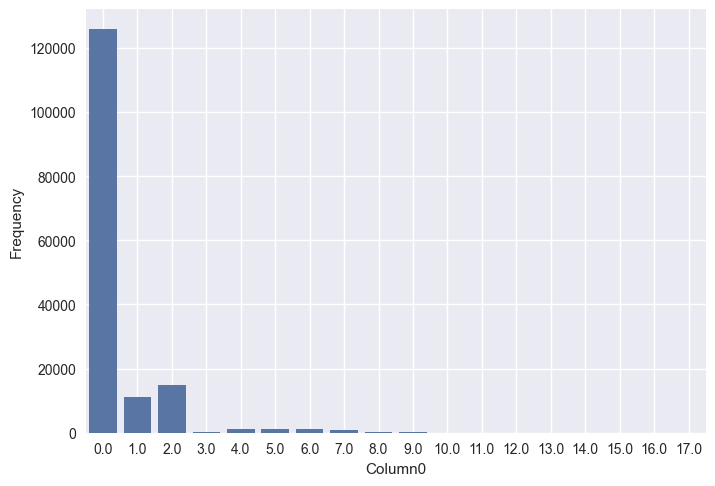

In [8]:
sns.countplot(x=x_eda['Column0'])
plt.ylabel('Frequency')
plt.grid(visible=True)
plt.show()

Here by seeing the values of this feature, we are assuming that this feature as categorical and ordinal.

Column1

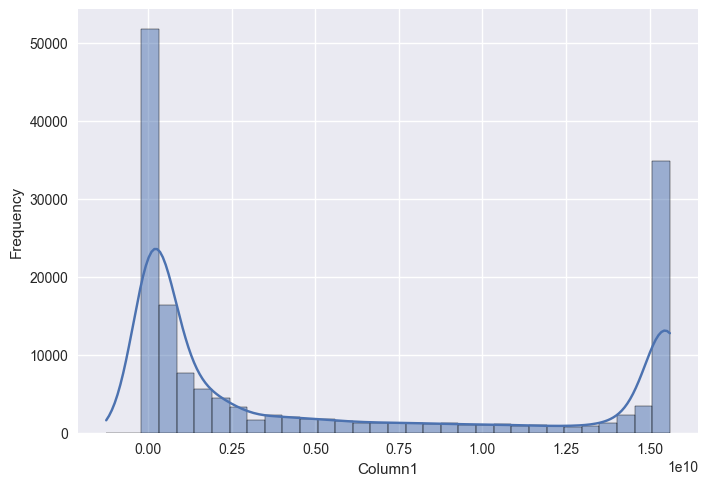

In [9]:
sns.histplot(np.power(x_eda['Column1'],3),kde=True)
plt.ylabel('Frequency')
plt.show()

When power transform of 3 applied to `Column1` we get almost a skewed distribution.

In [18]:
x_eda['Column1'].unique().shape

(2535,)

Here we are assuming `Column1` as numerical because of the number of unique values are fairly large.

In [1]:
sns.boxplot(x_eda['Column1']);

NameError: name 'sns' is not defined

From the boxplot it is clear that there is no outliers in `Column1`

Column2

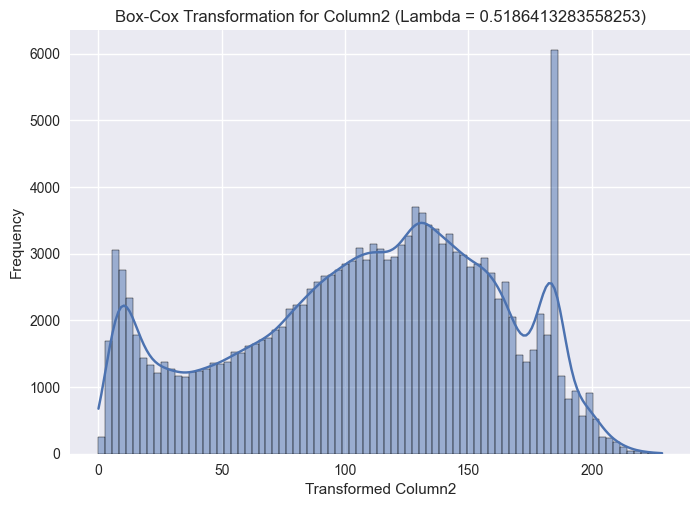

In [11]:
box_cox_transformed,fitted_lambda=box_cox(x_eda['Column2'])
sns.histplot(box_cox_transformed,kde=True)
plt.title(f"Box-Cox Transformation for Column2 (Lambda = {fitted_lambda})")
plt.xlabel('Transformed Column2')
plt.ylabel('Frequency')
plt.show()

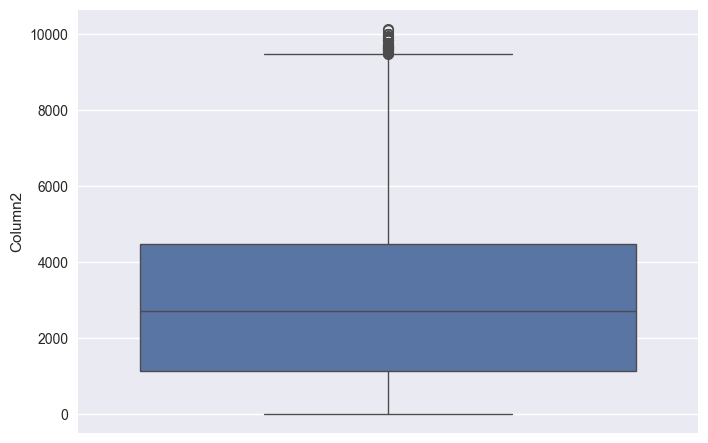

In [21]:
sns.boxplot(x_eda['Column2']);

There were some outliers found in the `Column2` they were removed and we are considering this as continous feature.

Column3

In [2]:
x_eda['Column3'].unique().shape

NameError: name 'x_eda' is not defined

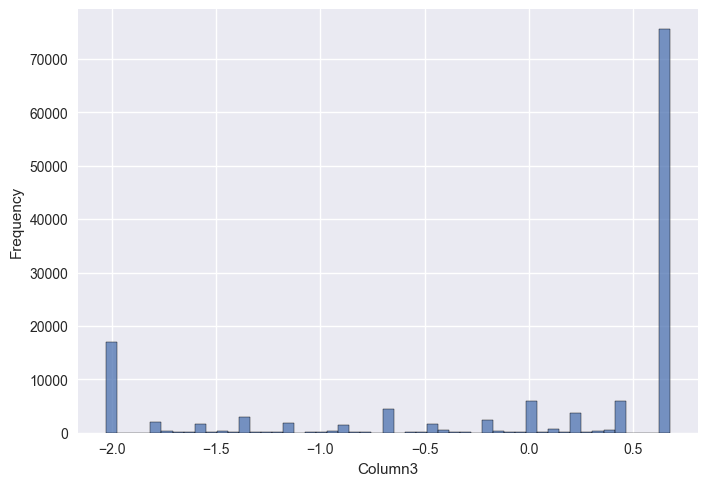

In [12]:
sns.histplot(x_eda['Column3']);
plt.ylabel('Frequency')
plt.show()

In [3]:
sns.boxplot(x_eda['Column3']);

NameError: name 'sns' is not defined

In `Column3` the values are having decimals and up on checking only 48 unique values found and no outliers, for now assume as continuous numerical feature.

Column4

In [25]:
x_eda['Column4'].value_counts().shape

(47,)

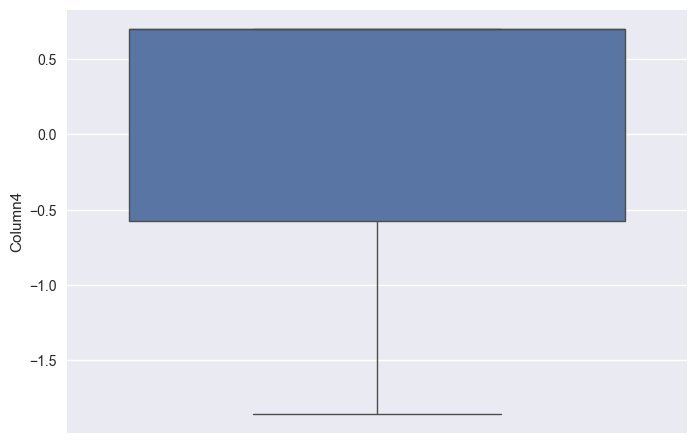

In [26]:
sns.boxplot(x_eda['Column4']);

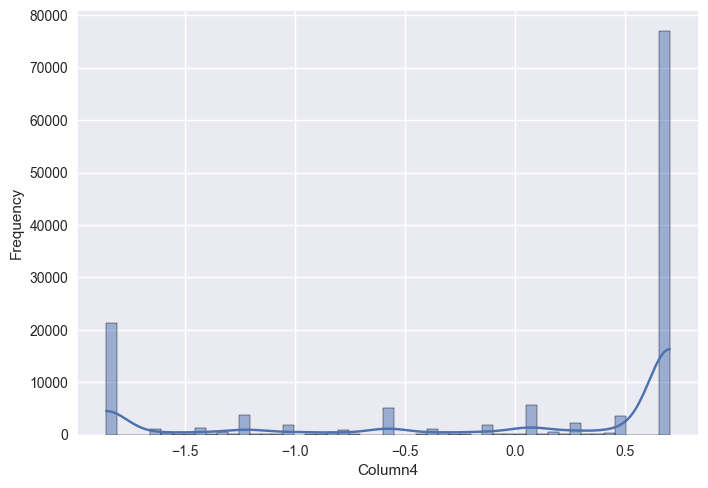

In [13]:
sns.histplot(x_eda['Column4'],kde=True);
plt.ylabel('Frequency')
plt.show()

`Column4` has asymmetric tails at both ends.

In `Column4` the values are having decimals and up on checking only 48 unique values found and no outliers, for now assume as continuous numerical feature. But the histograms of `Column3` and `Column4` are similar. Further checking of correlation among them.

In [28]:
x_eda[['Column3','Column4']].corr()

,Column3,Column4
Column3,1.000000,0.881751
Column4,0.881751,1.000000


So here we can see a high correlation among `Column3` and `Column4`, either one of the column can be dropped.

Column5

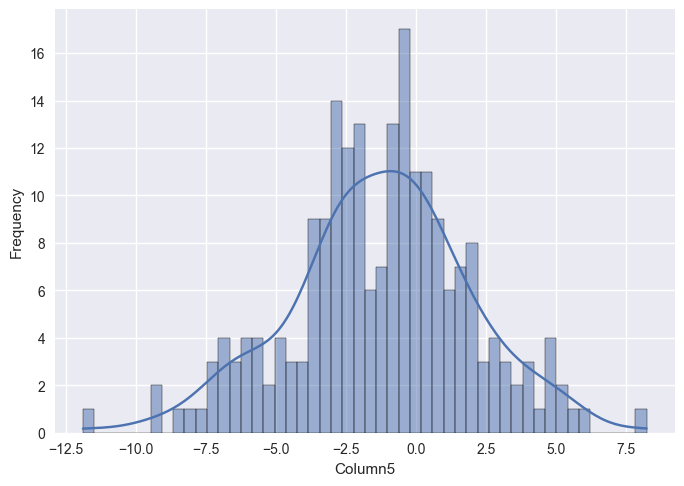

In [14]:
sns.histplot(np.log2(x_eda['Column5'].values),bins=50,kde=True);
plt.ylabel('Frequency')
plt.xlabel('Column5');
plt.show()

After applying Log10 `Column5` became a normal distribution.

Column6

In [30]:
x_eda['Column6'].unique().shape

(37743,)

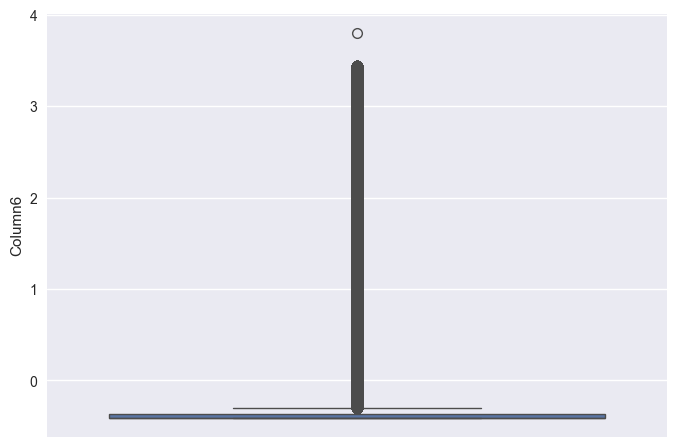

In [31]:
sns.boxplot(x_eda['Column6']);

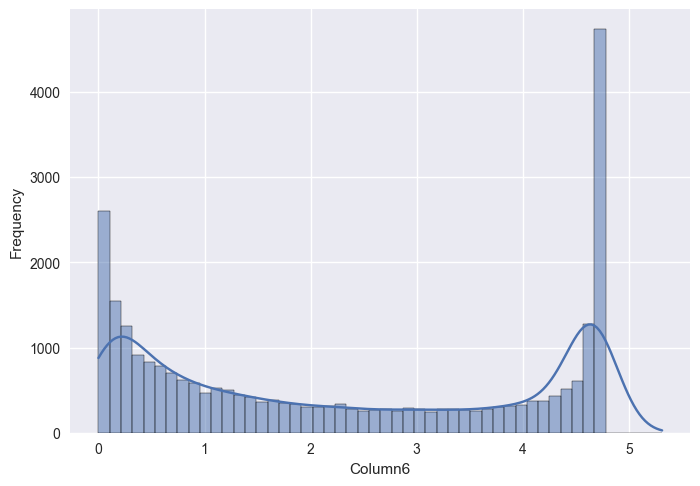

In [15]:
sns.histplot(np.power(x_eda['Column6'],1.25),kde=True,bins=50);
plt.ylabel('Frequency')
plt.show()

`Column6` is having two humps on the either ends of the KDE. So which suggests that there could be two clusters in this column. We got this by applying power transformation of 1.25 to the feature.

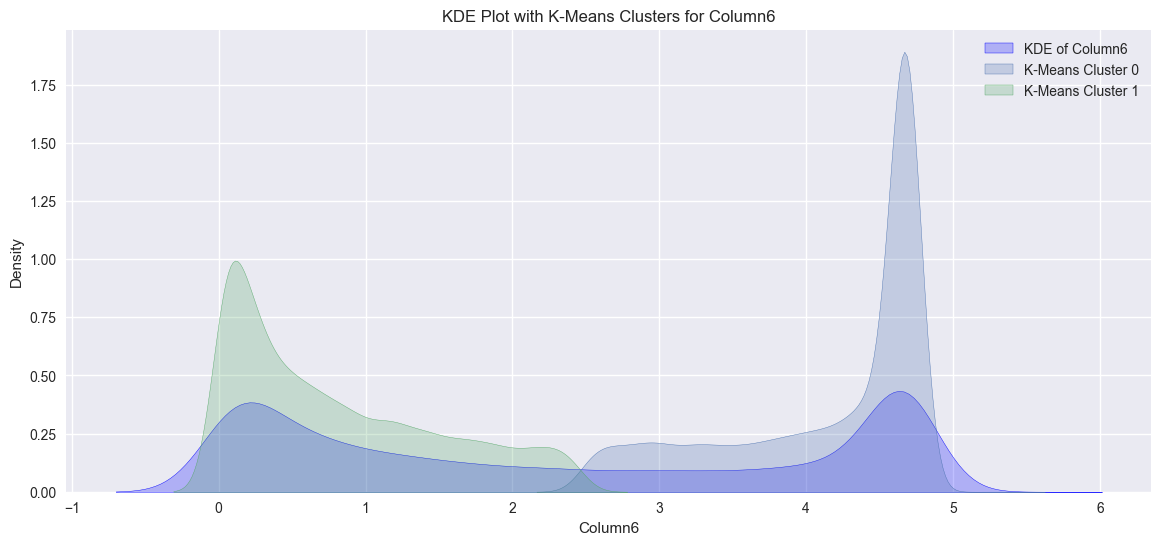

In [33]:
visualize_clusters(np.power(x_eda['Column6'],1.25).dropna())

Upon using K means clustering algorithm. It is found that `column6` is having two clusters.

In [34]:
x_eda[['Column5','Column6']].corr(method='spearman')

,Column5,Column6
Column5,1.000000,0.294039
Column6,0.294039,1.000000


Together these two columns poses some sort of non linear relationship as pearson's correlation was about 0.0015 and in spearman shows 0.294

Column18

In [36]:
x_eda['Column18'].value_counts()

Column18
0.0     136535
1.0      18682
2.0       1292
3.0        327
4.0         92
5.0         39
6.0         24
8.0         18
7.0          9
9.0          7
12.0         1
Name: count, dtype: int64

Checking for Outliers

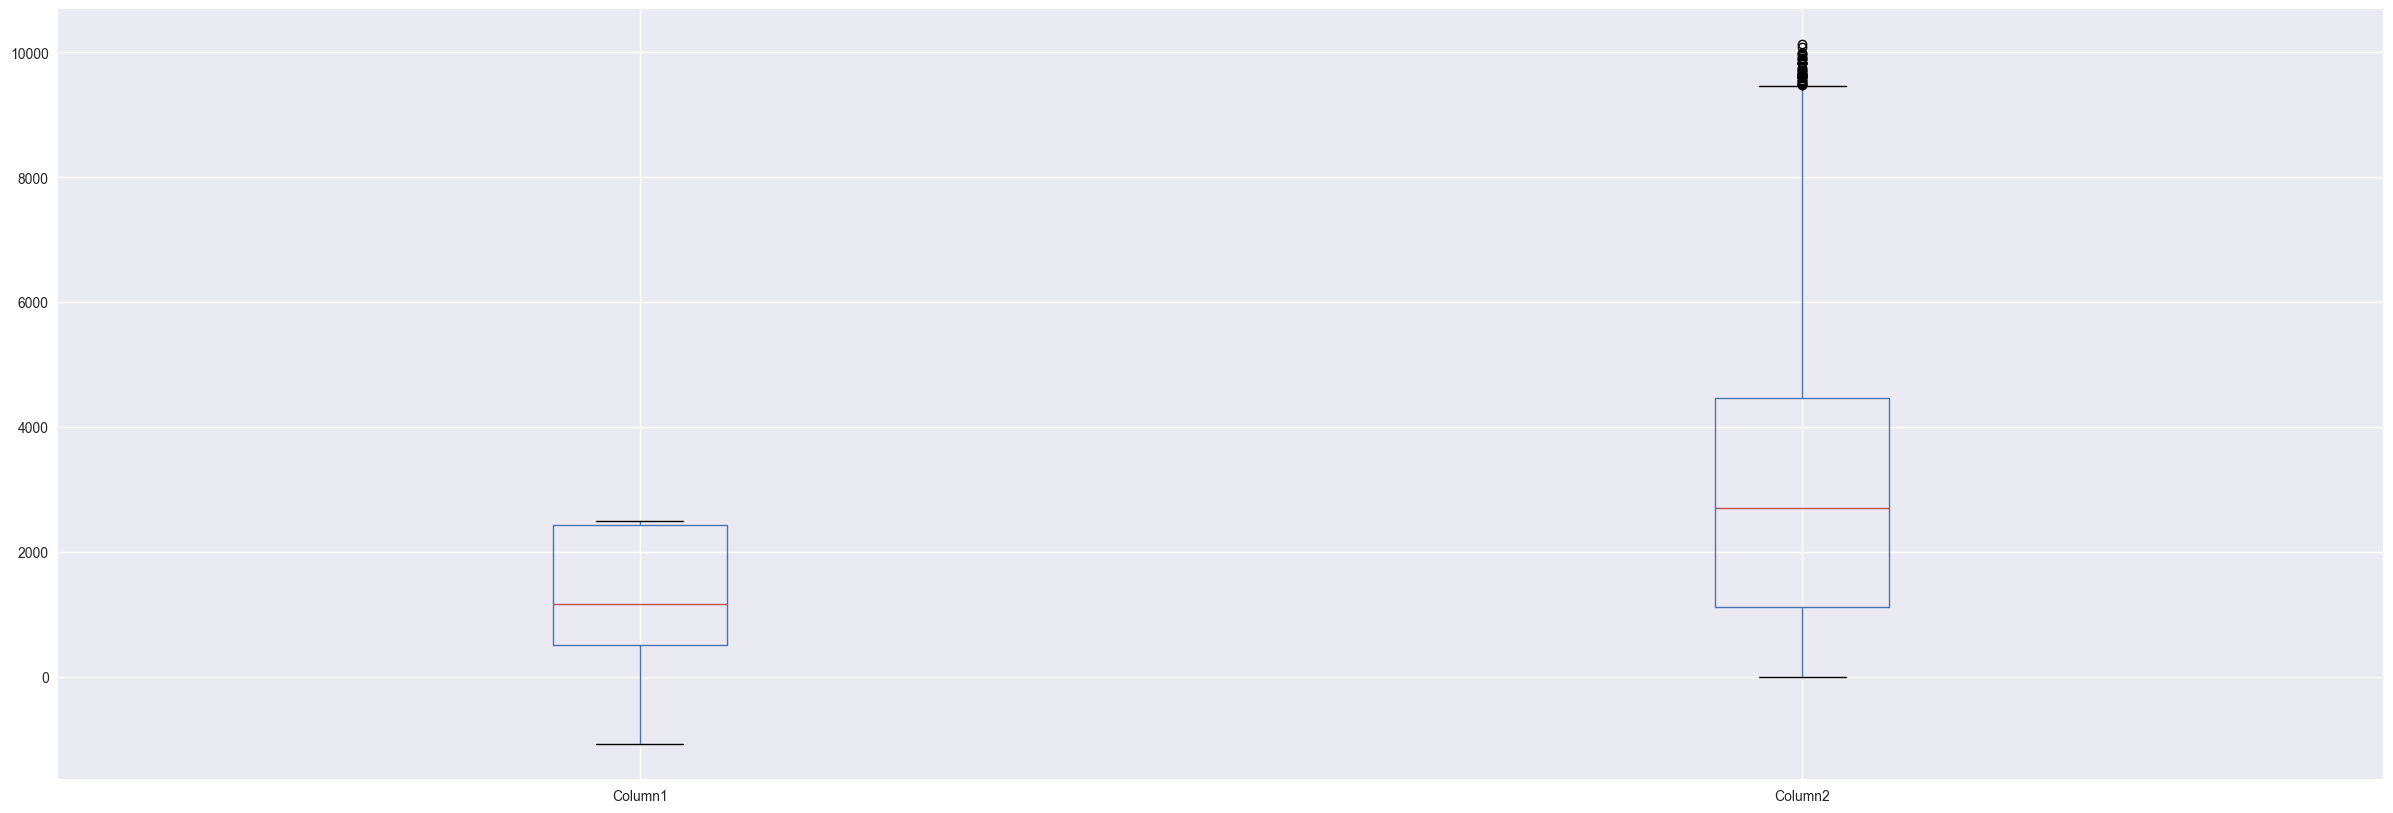

In [35]:
columns=['Column1','Column2']
x_eda[columns].boxplot(figsize=(30,10));

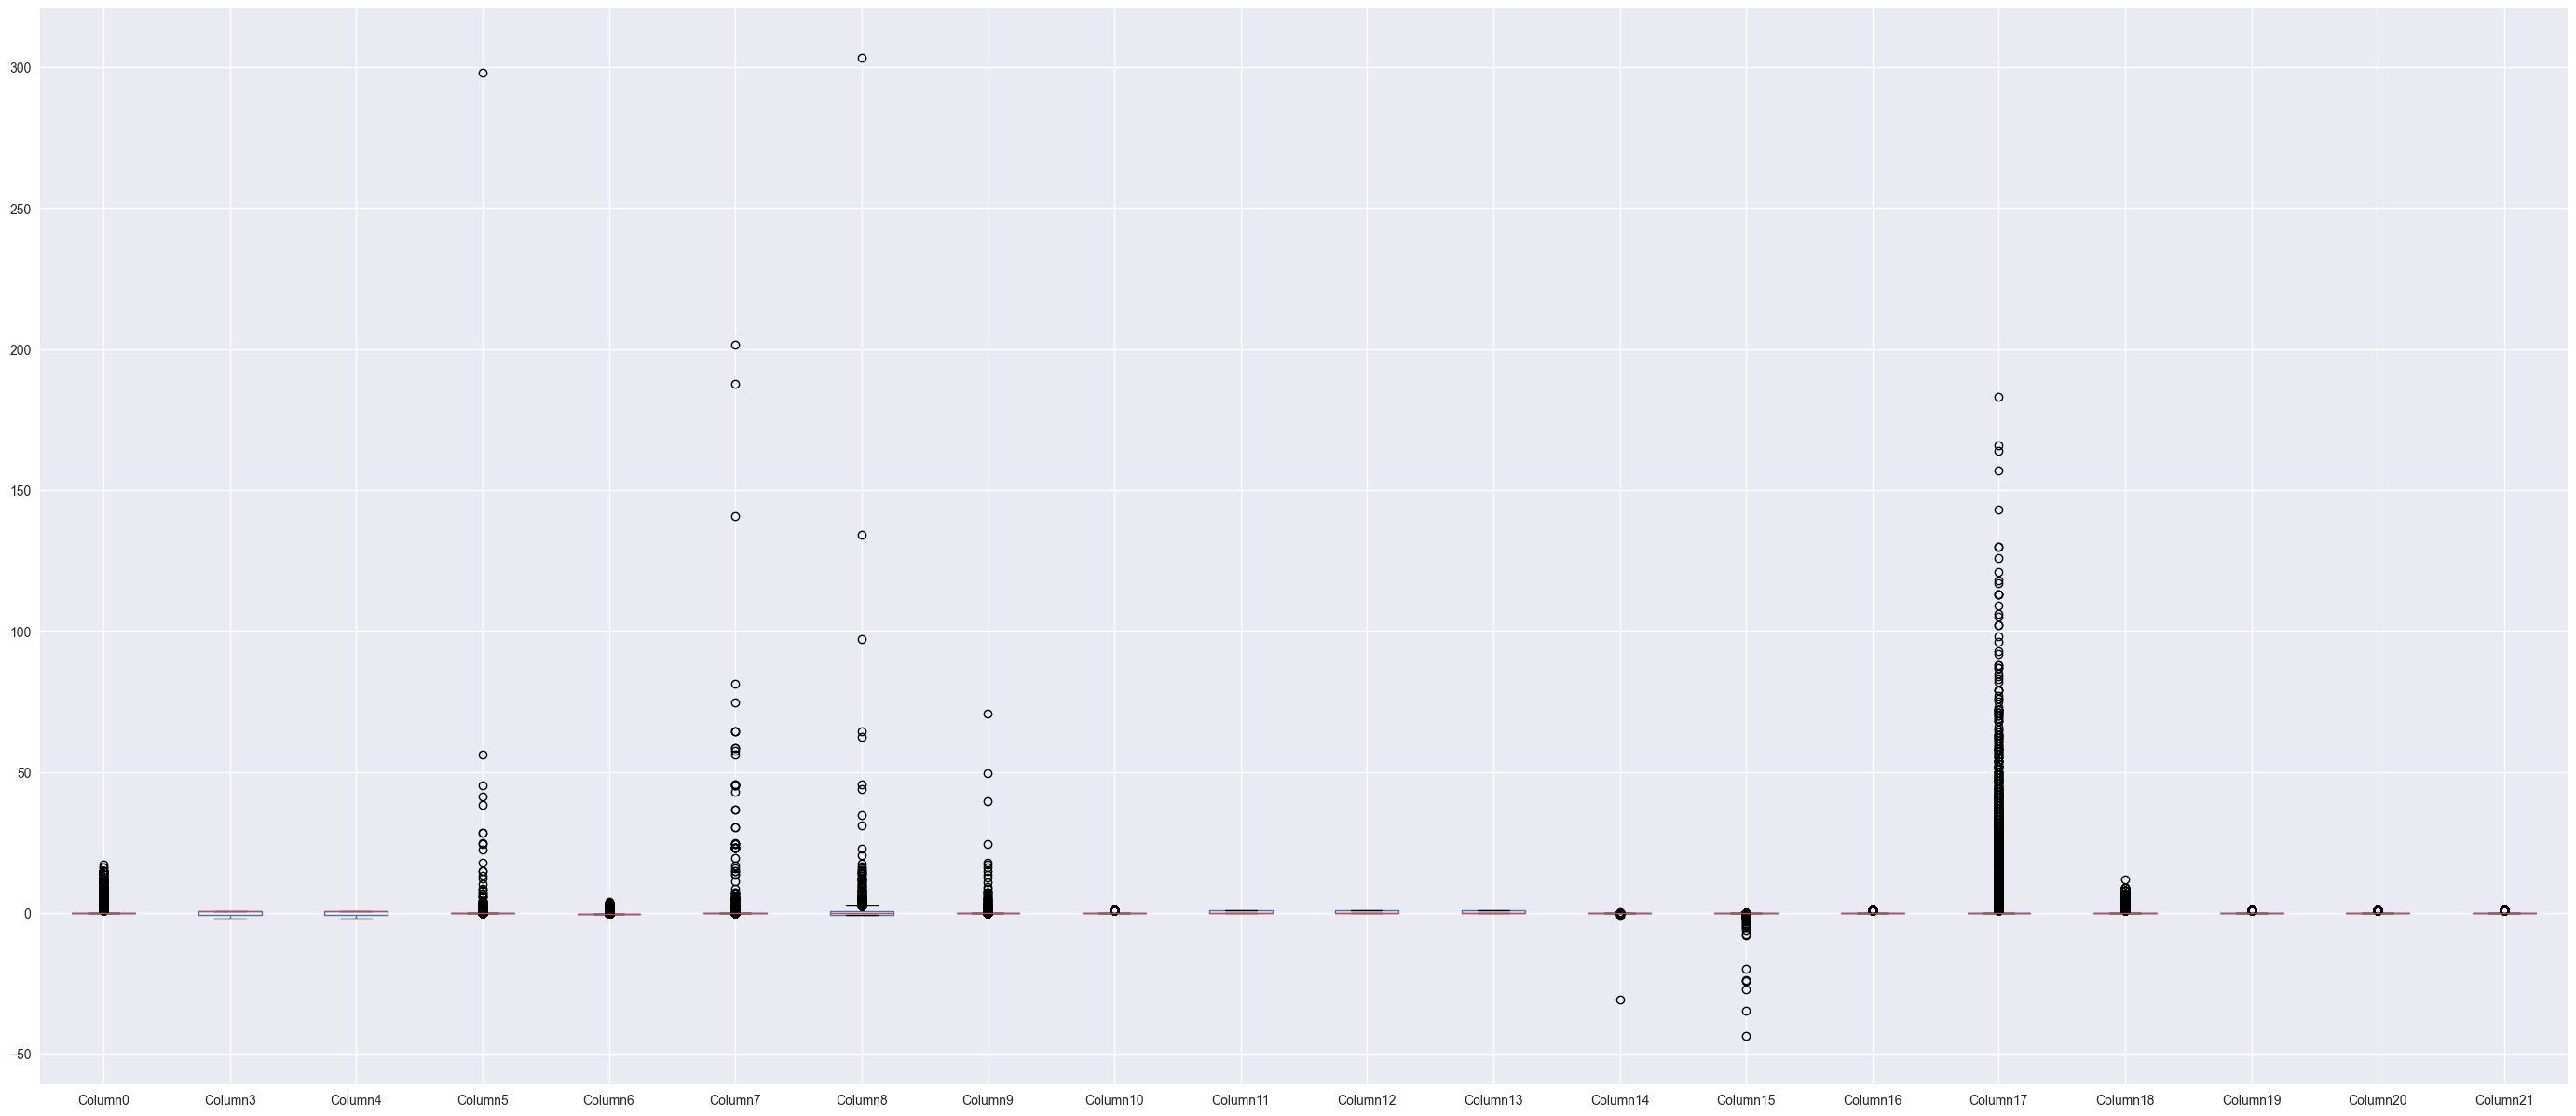

In [36]:
x_eda.loc[:,~x_eda.columns.isin(columns)].boxplot(figsize=(35,15));

In [9]:
def outlier_counts(df:pd.DataFrame, column_name:str):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]
    return num_outliers

In [10]:
def detect_unique_outliers(df: pd.DataFrame):
    outlier_rows = pd.DataFrame()
    for column in df.select_dtypes(include=[float, int]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_rows = pd.concat([outlier_rows, outliers])
    unique_outlier_rows = outlier_rows.drop_duplicates()
    num_outliers = unique_outlier_rows.shape[0]
    return num_outliers

In [29]:
def outlier_capper(df:pd.Series, method:Literal['iqr','zscore']='iqr', factor:float=1.5):
    if method == 'iqr':
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - factor * IQR
        upper_fence = Q3 + factor * IQR
    elif method == 'zscore':
        mean = df.mean()
        std = df.std()
        lower_fence = mean - factor * std
        upper_fence = mean + factor * std
    return df.clip(lower_fence, upper_fence)

In [58]:
def outlier_remover(series: pd.Series, method: str = 'iqr', threshold: float = 1.5) -> pd.Series:
    if method == 'iqr':
        # IQR Method
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        return series[(series >= lower_bound) & (series <= upper_bound)]
    
    elif method == 'zscore':
        # Z-score Method
        mean = series.mean()
        std_dev = series.std()
        z_scores = (series - mean) / std_dev
        return series[np.abs(z_scores) <= threshold]
    
    else:
        raise ValueError("Method must be 'iqr' or 'zscore'")

In [16]:
print('Outliers')
print('-'*30)
for column in x_train.select_dtypes(include='number').columns:
    outlier_count=outlier_counts(x_train,column)
    print('{} : {}% outliers.'.format(column,round((outlier_count/m)*100,3)))
print('-'*30)
print(f'{round((detect_unique_outliers(x_train)/m)*100,2)}% of the Train Data has outliers.')

Outliers
------------------------------
Column0 : 19.814% outliers.
Column1 : 0.0% outliers.
Column2 : 0.026% outliers.
Column3 : 0.0% outliers.
Column4 : 0.0% outliers.
Column5 : 0.289% outliers.
Column6 : 22.798% outliers.
Column7 : 21.24% outliers.
Column8 : 0.359% outliers.
Column9 : 0.937% outliers.
Column10 : 24.057% outliers.
Column11 : 0.0% outliers.
Column12 : 0.0% outliers.
Column13 : 0.0% outliers.
Column14 : 18.569% outliers.
Column15 : 13.056% outliers.
Column16 : 0.12% outliers.
Column17 : 2.348% outliers.
Column18 : 13.043% outliers.
Column19 : 1.876% outliers.
Column20 : 0.935% outliers.
Column21 : 0.276% outliers.
------------------------------
68.07% of the Train Data has outliers.


Here majority of the features have outliers but `Column1`, `Column3-4`, `Column11-13` have zero outliers. 68.7% of the Train Data is consisting of outliers so we can't remove outliers for this case rather keep them. The columns having less than 5% outliers we can cap them.

Scatter Matrix

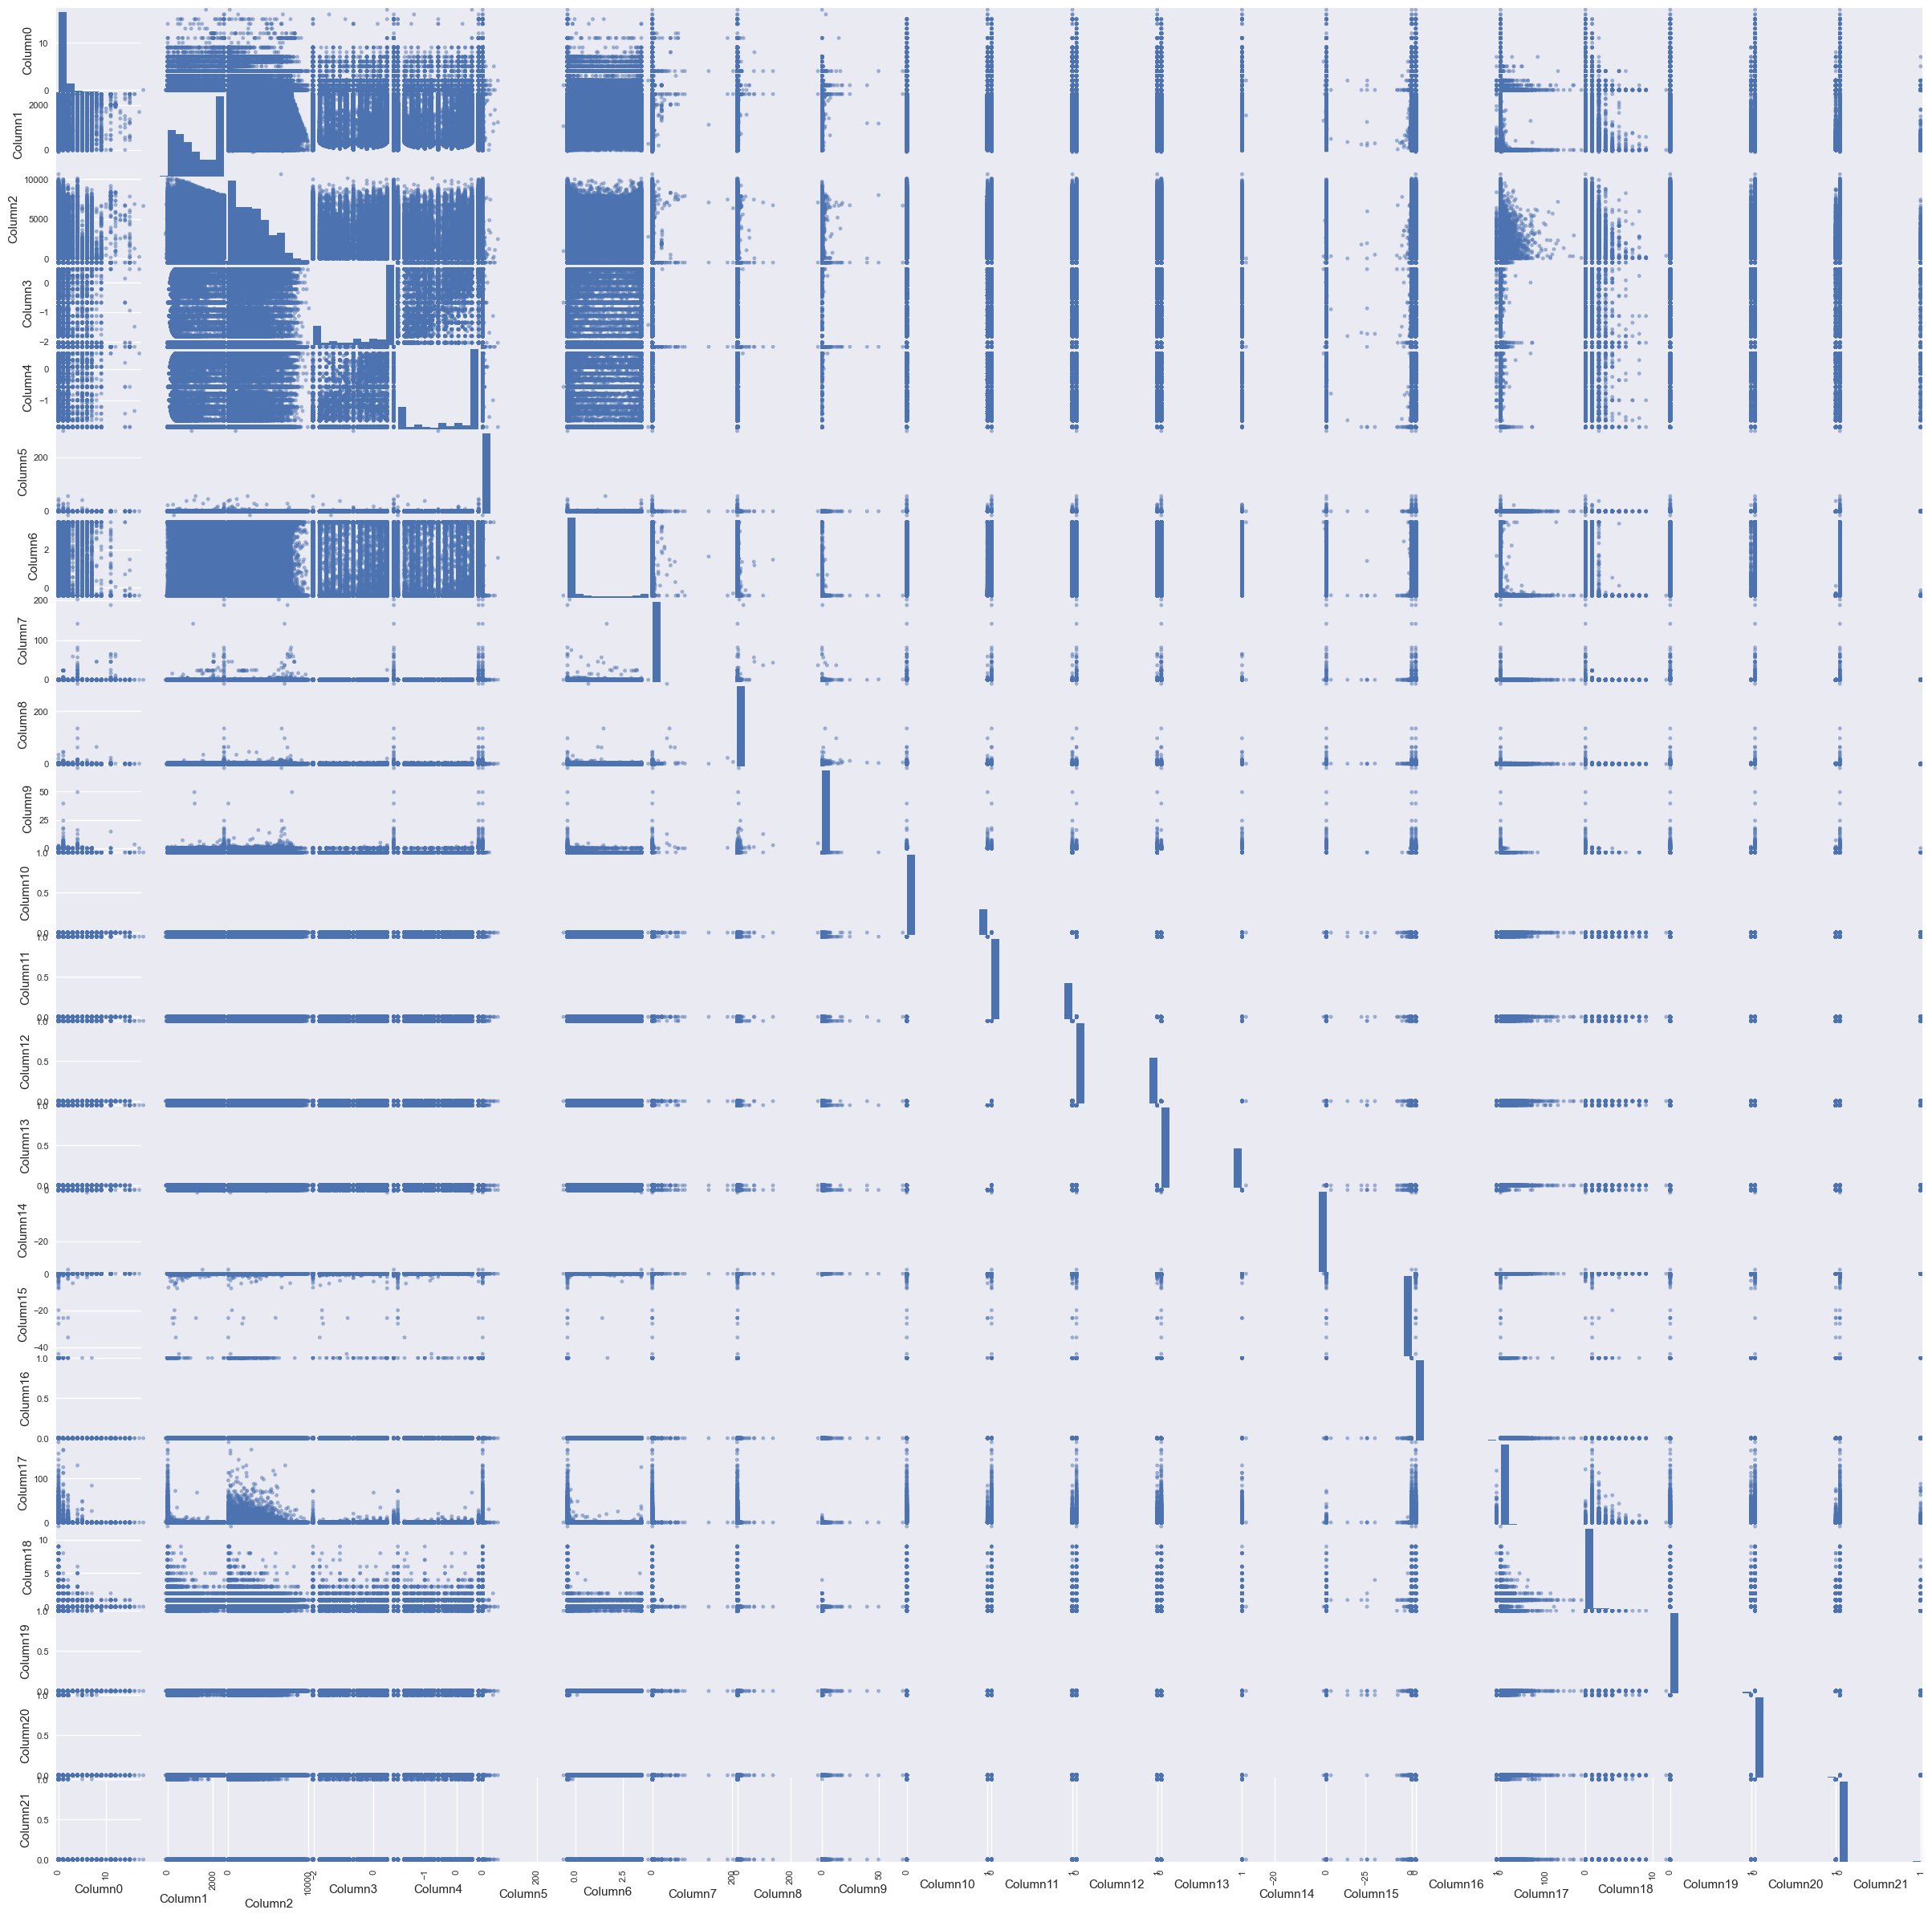

In [37]:
scatter_matrix(x_eda,figsize=(30,30));

Multivariate Analysis

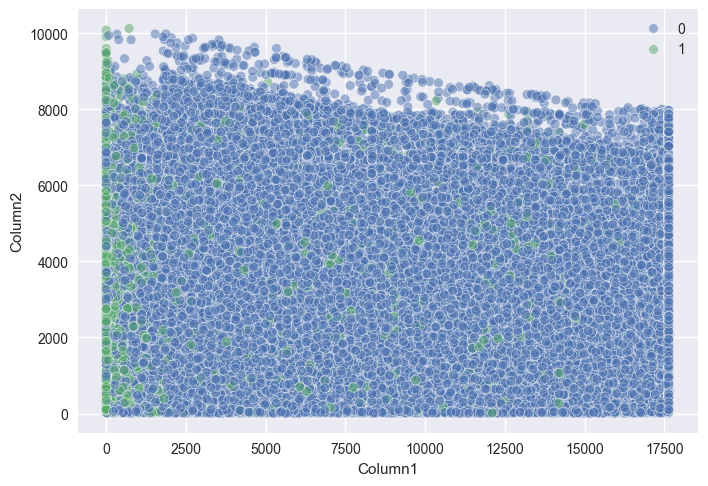

In [38]:
sns.scatterplot(x=np.power(x_eda['Column1'],1.25),y=x_eda['Column2'],alpha=0.5,hue=y_eda.values.ravel());

In [39]:
x_eda[['Column1','Column2']].corr()

,Column1,Column2
Column1,1.000000,0.229151
Column2,0.229151,1.000000


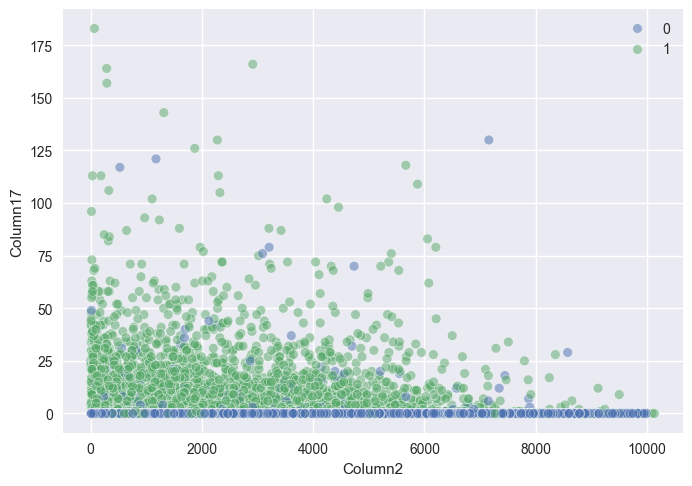

In [40]:
sns.scatterplot(x=x_eda['Column2'],y=x_eda['Column17'],alpha=0.5,hue=y_eda.values.ravel());

Missing Values

In [41]:
for col in x_eda.columns:
    print(f'{col}: {round((x_train[col].isnull().sum()/x_train.shape[0])*100,3)}% missing values')

Column0: 0.001% missing values
Column1: 0.0% missing values
Column2: 0.0% missing values
Column3: 16.087% missing values
Column4: 16.266% missing values
Column5: 21.293% missing values
Column6: 0.49% missing values
Column7: 0.0% missing values
Column8: 0.49% missing values
Column9: 93.25% missing values
Column10: 0.0% missing values
Column11: 0.0% missing values
Column12: 0.0% missing values
Column13: 0.0% missing values
Column14: 46.578% missing values
Column15: 2.096% missing values
Column16: 0.0% missing values
Column17: 0.0% missing values
Column18: 0.0% missing values
Column19: 0.0% missing values
Column20: 0.0% missing values
Column21: 0.0% missing values


In [42]:
for col in x_train.columns:
    if len(x_train[col].unique())<25:
        print(f'{col} has {x_train[col].unique().tolist()}')

Column0 has [2.0, 0.0, 1.0, 5.0, 6.0, 7.0, 4.0, 8.0, 15.0, 3.0, 9.0, 11.0, 12.0, 14.0, 10.0, 13.0, 16.0, 17.0, 18.0, nan]
Column10 has [0, 1]
Column11 has [0, 1]
Column12 has [0, 1]
Column13 has [0, 1]
Column16 has [0.0, 1.0, 2.0]
Column18 has [0.0, 1.0, 2.0, 3.0, 7.0, 6.0, 4.0, 5.0, 8.0, 9.0, 12.0]
Column19 has [0, 1]
Column20 has [0, 1]
Column21 has [0, 1]


Here for `Column9` has `93.33% of data is missing`. So we will delete this column.

In [42]:
x_train=x_train.drop(columns=['Column9'])
x_test=x_test.drop(columns=['Column9'])

Changing datatype of `Column16` and `Column18` to `int`

In [43]:
cols=['Column16','Column18','Column2']
x_train[cols]=x_train[cols].astype(int)
x_test[cols]=x_test[cols].astype(int)

In [45]:
x_train.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
ID,,,,,,,,,,,,,,,,,,,,,
ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,0,0,0,0,0.001351,0.00339,0,0,0,0,0,0
7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,0,0,0,0,0.001351,0.00339,0,0,0,0,0,0
22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,1,1,1,1,0.001351,0.00339,0,0,0,0,0,0
59f9b981472d97342587fb3e6392aeb1,0.0,211,59,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,0,0,0,0,NaN,0.00339,0,0,1,0,0,0
f6317cf7ecf126859804eddff279aead,0.0,718,950,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,0,0,0,0,NaN,0.00339,0,0,0,0,0,0


Correlation Matrix

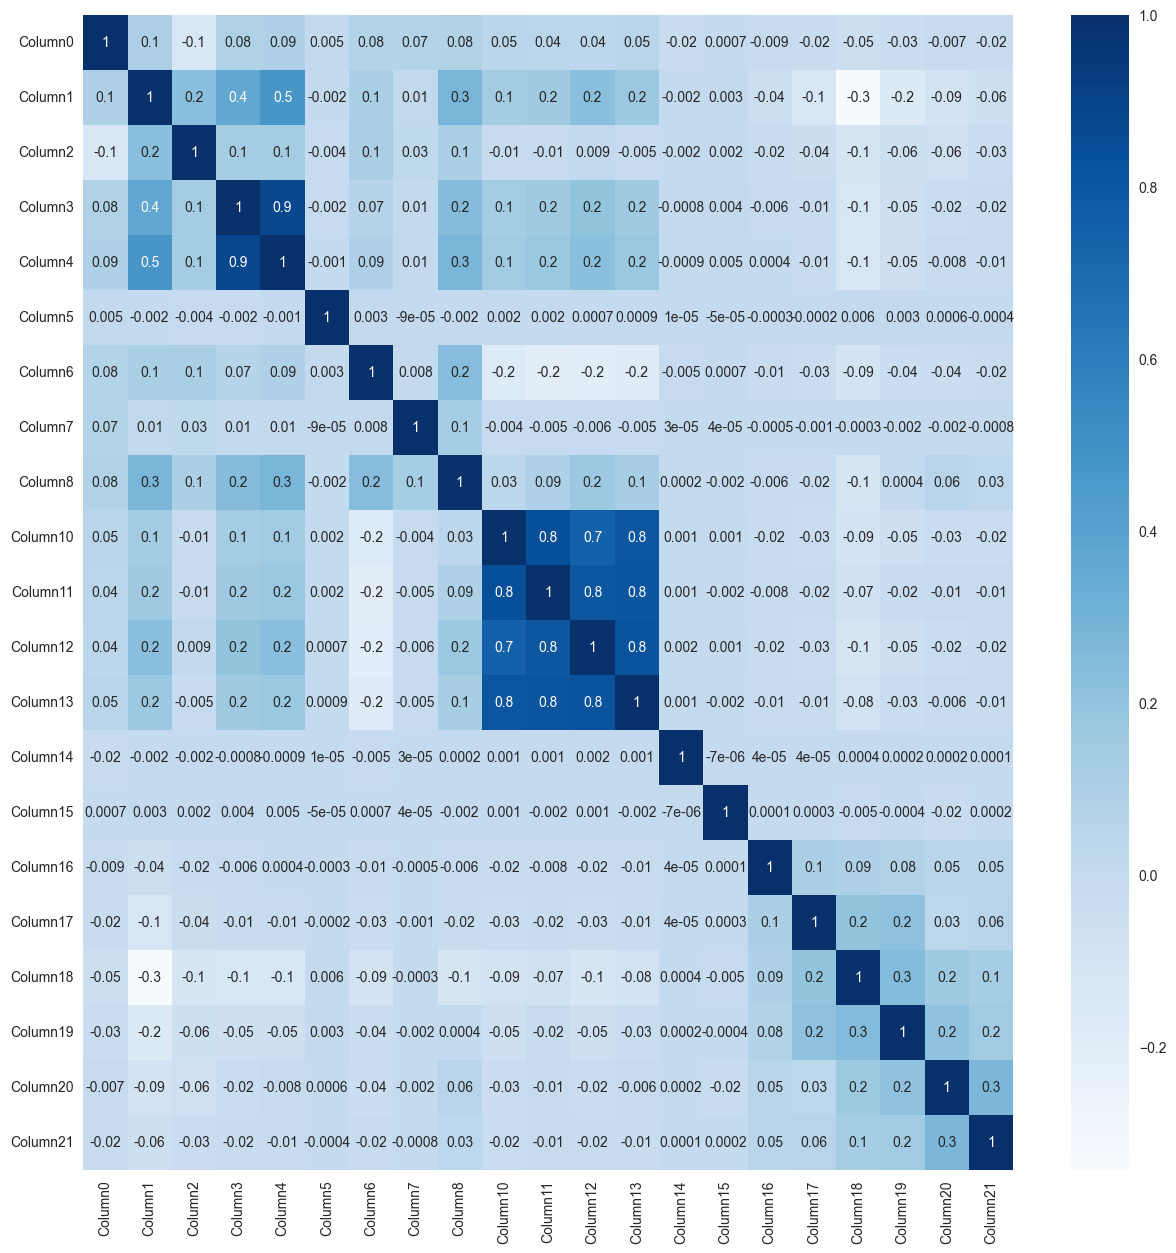

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train.corr(),annot=True,cmap='Blues',fmt='.1g');

In [46]:

def remove_mulicolinearity(correlation_matrix, threshold):
    # Get the absolute values of the correlation matrix
    abs_corr_matrix = correlation_matrix.abs()
    # Create a set to store columns that should be removed
    columns_to_remove = set()
    # Iterate over the upper triangle of the correlation matrix
    for i in range(len(abs_corr_matrix.columns)):
        for j in range(i+1, len(abs_corr_matrix.columns)):
            # If correlation exceeds the threshold, mark one of the columns for removal
            if abs_corr_matrix.iloc[i, j] > threshold:
                col1 = abs_corr_matrix.columns[i]
                col2 = abs_corr_matrix.columns[j]
                # Add the second column to the removal set
                columns_to_remove.add(col1)
    return list(columns_to_remove)


Columns having multicolinearity

In [47]:
multicolinearity_cols=remove_mulicolinearity(x_train.corr(),0.8)
print(', '.join(multicolinearity_cols))

Column11, Column12, Column10, Column3


In [48]:
x_train_multicolinearity=x_train.drop(columns=multicolinearity_cols)
x_test_multicolinearity=x_test.drop(columns=multicolinearity_cols)

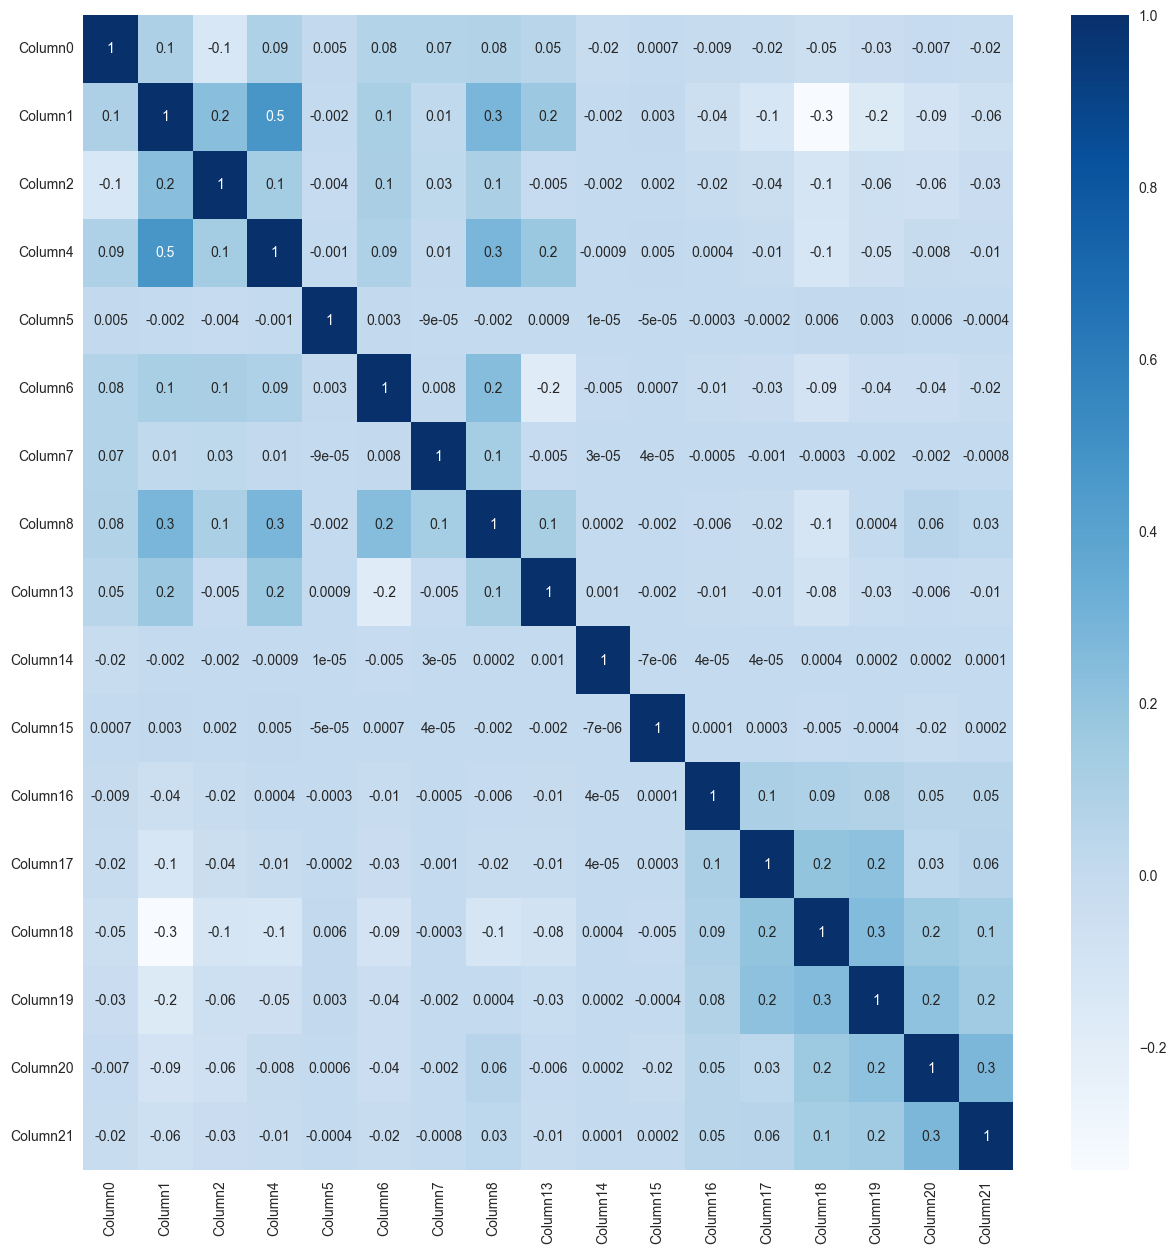

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train_multicolinearity.corr(),annot=True,cmap='Blues',fmt='.1g',);
plt.yticks(rotation=0);

Missing Values in the training set

In [51]:
for col in x_train_multicolinearity.columns:
    print(f'{col}: {round((x_train_multicolinearity[col].isnull().sum()/x_train_multicolinearity.shape[0])*100,3)}% missing values')

Column0: 0.001% missing values
Column1: 0.0% missing values
Column2: 0.0% missing values
Column4: 16.266% missing values
Column5: 21.293% missing values
Column6: 0.49% missing values
Column7: 0.0% missing values
Column8: 0.49% missing values
Column13: 0.0% missing values
Column14: 46.578% missing values
Column15: 2.096% missing values
Column16: 0.0% missing values
Column17: 0.0% missing values
Column18: 0.0% missing values
Column19: 0.0% missing values
Column20: 0.0% missing values
Column21: 0.0% missing values


Removing Outliers

In [57]:
print('Outliers')
print('-'*30)
columns_to_cap=[]
for column in x_train_multicolinearity.select_dtypes(include='number').columns:
    outlier_count=outlier_counts(x_train_multicolinearity,column)
    percent=round((outlier_count/m)*100,3)
    if percent<5.0 and percent>0.0:
        print('{} : {}% outliers.'.format(column,percent))
        columns_to_cap.append(column)
print('-'*30)
print(f'{round((detect_unique_outliers(x_train_multicolinearity[columns_to_cap])/m)*100,2)}% of the Train Data has outliers.')

Outliers
------------------------------
------------------------------
0.0% of the Train Data has outliers.


In [60]:
for column in columns_to_cap:
    x_train_multicolinearity[column]=remove_outliers(x_train_multicolinearity[column])

In [61]:
print('Outliers')
print('-'*30)
for column in x_train_multicolinearity.select_dtypes(include='number').columns:
    outlier_count=outlier_counts(x_train_multicolinearity,column)
    percent=round((outlier_count/m)*100,3)
    print('{} : {}% outliers.'.format(column,percent))
print('-'*30)
print(f'{round((detect_unique_outliers(x_train_multicolinearity)/m)*100,2)}% of the Train Data has outliers.')

Outliers
------------------------------
Column0 : 19.814% outliers.
Column1 : 0.0% outliers.
Column2 : 0.0% outliers.
Column4 : 0.0% outliers.
Column5 : 0.0% outliers.
Column6 : 22.798% outliers.
Column7 : 21.24% outliers.
Column8 : 0.0% outliers.
Column13 : 0.0% outliers.
Column14 : 18.569% outliers.
Column15 : 13.056% outliers.
Column16 : 0.0% outliers.
Column17 : 0.0% outliers.
Column18 : 13.043% outliers.
Column19 : 0.0% outliers.
Column20 : 0.0% outliers.
Column21 : 0.0% outliers.
------------------------------
57.19% of the Train Data has outliers.


In [62]:
for col in x_train.columns:
    if len(x_train[col].unique())<25:
        print(f'{col} has {x_train[col].unique().tolist()}')

Column0 has [2.0, 0.0, 1.0, 5.0, 6.0, 7.0, 4.0, 8.0, 15.0, 3.0, 9.0, 11.0, 12.0, 14.0, 10.0, 13.0, 16.0, 17.0, 18.0, nan]
Column10 has [0, 1]
Column11 has [0, 1]
Column12 has [0, 1]
Column13 has [0, 1]
Column16 has [0, 1, 2]
Column18 has [0, 1, 2, 3, 7, 6, 4, 5, 8, 9, 12]
Column19 has [0, 1]
Column20 has [0, 1]
Column21 has [0, 1]


Preprocessing Pipeline

In [63]:
preprocess=Pipeline([
    ('imputation',ColumnTransformer([('frequent',SimpleImputer(strategy='most_frequent'),['Column0']),('mean',SimpleImputer(strategy='mean'),['Column4','Column5','Column6','Column8','Column14','Column15'])],remainder='passthrough',n_jobs=-1,verbose_feature_names_out=False)),
    ('scaling',ColumnTransformer([('std',StandardScaler(),['Column1','Column4','Column5','Column6','Column7','Column8','Column14','Column15']),('ordinal',OrdinalEncoder(),['Column0'])],remainder='passthrough',n_jobs=-1,verbose_feature_names_out=False))
]).set_output(transform='pandas')
x_train_preprocessed=preprocess.fit_transform(x_train_multicolinearity)
x_test_preprocessed=preprocess.transform(x_test_multicolinearity)

Model Selection

In [64]:
models=[
    ('Logistic Regression',LogisticRegression(random_state=42,n_jobs=-1)),
    ('SGD Classifier',SGDClassifier(random_state=42,n_jobs=-1)),
    ('Ridge Classifier',RidgeClassifier(random_state=42)),
    ('Decision Tree Classifier',DecisionTreeClassifier(random_state=42)),
    ('Random Forest Classifier',RandomForestClassifier(random_state=42,n_jobs=-1)),
    ('AdaBoost Classifier',AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting Classifier',GradientBoostingClassifier(random_state=42)),
    ('XGBoost Classifier',XGBClassifier(random_state=42)),
]
scoring=('accuracy', 'recall', 'precision', 'f1')
for name,model in models:
    cv_results=cross_validate(model,x_train_preprocessed,y_train.values.ravel(),cv=5,scoring=scoring,n_jobs=-1,error_score=0,return_train_score=True)
    train_accuracy=cv_results['train_accuracy']
    test_accuracy=cv_results['test_accuracy']
    train_recall=cv_results['train_recall']
    test_recall=cv_results['test_recall']
    train_precision=cv_results['train_precision']
    test_precision=cv_results['test_precision']
    train_f1=cv_results['train_f1']
    test_f1=cv_results['test_f1']
    print(f'Performance of {name}')
    print(f'Train Accuracy: Mean: {train_accuracy.mean():.3f} std: {train_accuracy.std():.3f}')
    print(f'Train Recall: Mean: {train_recall.mean():.3f} std: {train_recall.std():.3f}')
    print(f'Train Precision: Mean: {train_precision.mean():.3f} std: {train_precision.std():.3f}')
    print(f'Train F1 Score: Mean: {train_f1.mean():.3f} std: {train_f1.std():.3f}')
    print('-'*50)
    print(f'Validation Accuracy: Mean: {test_accuracy.mean():.3f} std: {test_accuracy.std():.3f}')
    print(f'Validation Recall: Mean: {test_recall.mean():.3f} std: {test_recall.std():.3f}')
    print(f'Validation Precision: Mean: {test_precision.mean():.3f} std: {test_precision.std():.3f}')
    print(f'Validation F1 Score: Mean: {test_f1.mean():.3f} std: {test_f1.std():.3f}')
    print('='*50)

Performance of Logistic Regression
Train Accuracy: Mean: 0.968 std: 0.001
Train Recall: Mean: 0.900 std: 0.019
Train Precision: Mean: 0.789 std: 0.007
Train F1 Score: Mean: 0.841 std: 0.005
--------------------------------------------------
Validation Accuracy: Mean: 0.968 std: 0.000
Validation Recall: Mean: 0.900 std: 0.017
Validation Precision: Mean: 0.789 std: 0.008
Validation F1 Score: Mean: 0.841 std: 0.004
Performance of SGD Classifier
Train Accuracy: Mean: 0.947 std: 0.018
Train Recall: Mean: 0.573 std: 0.255
Train Precision: Mean: 0.815 std: 0.011
Train F1 Score: Mean: 0.639 std: 0.172
--------------------------------------------------
Validation Accuracy: Mean: 0.947 std: 0.018
Validation Recall: Mean: 0.575 std: 0.254
Validation Precision: Mean: 0.815 std: 0.011
Validation F1 Score: Mean: 0.641 std: 0.172
Performance of Ridge Classifier
Train Accuracy: Mean: 0.968 std: 0.000
Train Recall: Mean: 0.890 std: 0.005
Train Precision: Mean: 0.793 std: 0.003
Train F1 Score: Mean: 0.8

### Top Contenders:
- **XGBoost Classifier**: Stands out with the highest recall and precision, offering an impressive balance between these metrics. It achieves the highest F1 score and generalizes well on both training and testing data. Its performance reflects strong handling of complex data, including imbalanced classes and potential outliers, making it a top choice for applications requiring high accuracy and robustness.

- **Random Forest Classifier**: Delivers exceptional performance across accuracy, recall, precision, and F1 score with very low standard deviation. Its ability to generalize well and maintain a good balance between metrics without overfitting makes it a highly reliable model. It’s a solid choice for scenarios requiring robust performance with less sensitivity to hyperparameters.

- **Gradient Boosting Classifier**: Shows slightly better recall than Random Forest but has marginally lower precision. It is consistent and competitive, providing strong overall performance with high F1 scores. It’s well-suited for tasks where capturing the majority of positive cases is critical, though it may need careful tuning to balance precision and recall effectively.

### Runners-Up:
- **AdaBoost Classifier**: Performs well but slightly lags behind the top contenders in terms of precision and overall metrics. It maintains consistent performance across recall and F1 score, making it a good choice for scenarios where a balanced approach to recall and precision is needed, but with a bit less emphasis on absolute performance compared to Random Forest and XGBoost.

- **Logistic Regression**: Serves as a strong baseline with reliable performance, but does not match the top contenders in recall and precision for more complex tasks. It’s suitable for simpler tasks where interpretability and straightforward modeling are prioritized over achieving the highest possible performance metrics.

### Underperformers:
- **SGD Classifier**: Displays notably lower recall compared to other models, which undermines its suitability for handling imbalanced classes. Its lower performance metrics overall make it less effective for scenarios where high recall is essential.

- **Ridge Classifier**: Provides decent performance but lacks the balance of precision and recall seen in the top ensemble methods. It is less capable in scenarios where nuanced trade-offs between recall and precision are required.

- **Decision Tree Classifier**: Shows perfect training performance but suffers from significant overfitting, leading to lower performance on testing data. Its high variance indicates that it’s less reliable for generalization and more prone to overfitting issues.

---

**XGBoost Classifier** is the best candidate for further tuning  due to its superior balance of recall and precision, coupled with strong generalization. **Random Forest Classifier** is a close second for its robustness and consistency, while **Gradient Boosting Classifier** offers competitive performance with a focus on high recall.

XGBoost Classifier without Hyperparameter Tuning 

In [10]:
model=XGBClassifier(random_state=42)
model.fit(x_train_preprocessed,y_train.values.ravel())
y_train_predict=model.predict(x_train_preprocessed)
y_test_predict=model.predict(x_test_preprocessed)

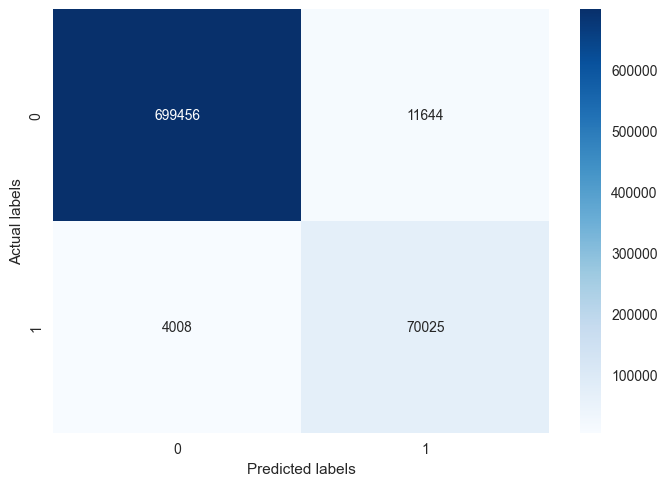

In [19]:
cm_train=confusion_matrix(y_train,y_train_predict)
sns.heatmap(cm_train,annot=True,cmap='Blues',fmt='.11g').set(xlabel='Predicted labels',ylabel='Actual labels');

In [20]:
print(f'Training Accuracy: {accuracy_score(y_train,y_train_predict):.3f}')
print(f'Training Recall: {recall_score(y_train,y_train_predict):.3f}')
print(f'Training Precision: {precision_score(y_train,y_train_predict):.3f}')
print(f'Training F1 Score: {f1_score(y_train,y_train_predict):.3f}')

Training Accuracy: 0.980
Training Recall: 0.946
Training Precision: 0.857
Training F1 Score: 0.899


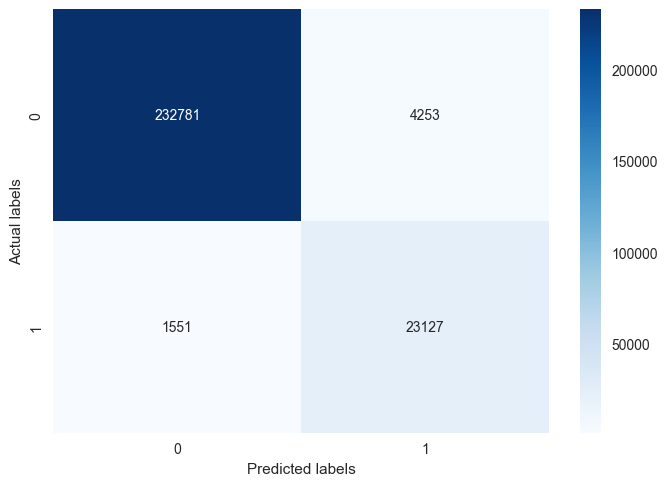

In [21]:
cm_test=confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm_test,annot=True,cmap='Blues',fmt='.11g').set(xlabel='Predicted labels',ylabel='Actual labels');

In [22]:
print(f'Testing Accuracy: {accuracy_score(y_test,y_test_predict):.3f}')
print(f'Testing Recall: {recall_score(y_test,y_test_predict):.3f}')
print(f'Testing Precision: {precision_score(y_test,y_test_predict):.3f}')
print(f'Testing F1 Score: {f1_score(y_test,y_test_predict):.3f}')

Testing Accuracy: 0.978
Testing Recall: 0.937
Testing Precision: 0.845
Testing F1 Score: 0.889


In [23]:
roc_score=roc_auc_score(y_test,model.predict_proba(x_test_preprocessed)[:,1])
print(f'ROC AUC Score for Gradient Boosting Classifier: {roc_score:.5f}')

ROC AUC Score for Gradient Boosting Classifier: 0.99466


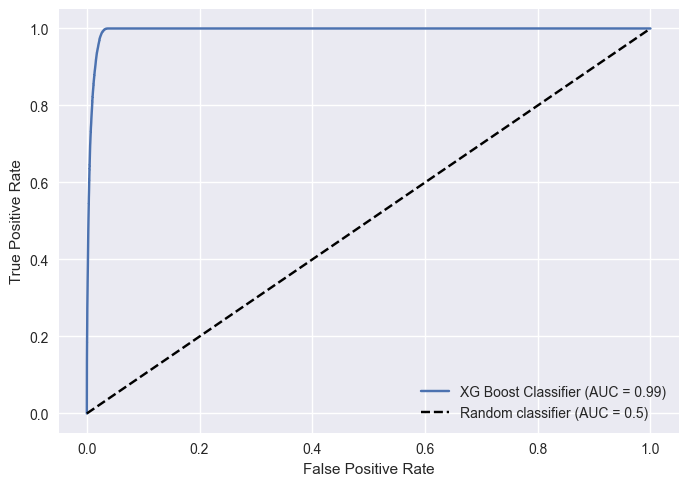

In [24]:
fpr,tpr,_=roc_curve(y_test,model.predict_proba(x_test_preprocessed)[:,1])
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_score,estimator_name='XG Boost Classifier').plot();
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)') 
plt.legend()
plt.show()

XGBoost Classifier with Hyperparameter Tuning 

In [65]:
params_grid = {
    'n_estimators': [100, 300, 500, 700, 1000,1500,2000,2500,3000],
    'learning_rate': [0.005,0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7,10,13],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.4,0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0,1, 1.5, 2]
}

In [27]:
xg_boost=RandomizedSearchCV(XGBClassifier(random_state=42),params_grid,scoring='f1',n_iter=20,n_jobs=-1,return_train_score=True,random_state=42,refit=True)
xg_boost.fit(x_train_preprocessed,y_train.values.ravel())

ValueError: 'f1_marco' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.

In [35]:
xg_boost.best_params_

{'subsample': 0.8,
 'reg_lambda': 1.5,
 'reg_alpha': 0.1,
 'n_estimators': 1000,
 'min_child_weight': 3,
 'max_depth': 7,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [66]:
best_params={'subsample': 0.8,
 'reg_lambda': 1.5,
 'reg_alpha': 0.1,
 'n_estimators': 1000,
 'min_child_weight': 3,
 'max_depth': 7,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [67]:
model=XGBClassifier(**best_params,random_state=42)
model.fit(x_train_preprocessed,y_train.values.ravel())
y_train_predict=model.predict(x_train_preprocessed)
y_test_predict=model.predict(x_test_preprocessed)

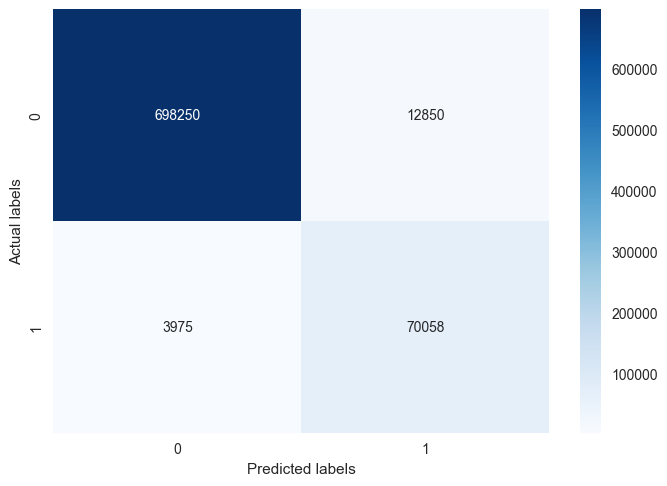

In [68]:
cm_train=confusion_matrix(y_train,y_train_predict)
sns.heatmap(cm_train,annot=True,cmap='Blues',fmt='.11g').set(xlabel='Predicted labels',ylabel='Actual labels');

In [69]:
print(f'Training Accuracy: {accuracy_score(y_train,y_train_predict):.3f}')
print(f'Training Recall: {recall_score(y_train,y_train_predict):.3f}')
print(f'Training Precision: {precision_score(y_train,y_train_predict):.3f}')
print(f'Training F1 Score: {f1_score(y_train,y_train_predict):.3f}')

Training Accuracy: 0.979
Training Recall: 0.946
Training Precision: 0.845
Training F1 Score: 0.893


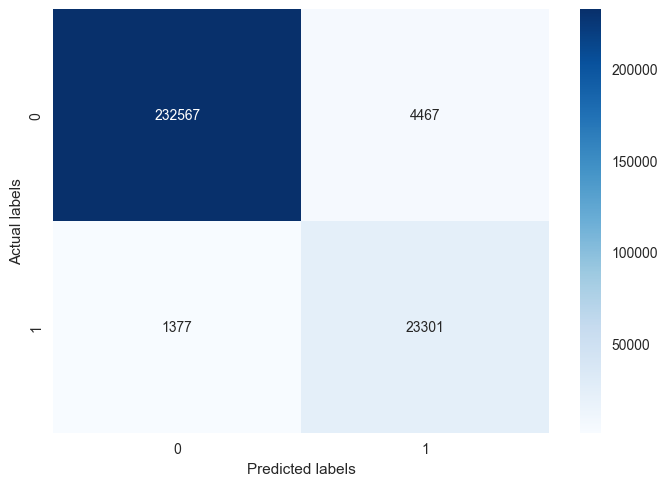

In [70]:
cm_test=confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm_test,annot=True,cmap='Blues',fmt='.11g').set(xlabel='Predicted labels',ylabel='Actual labels');

In [71]:
print(f'Testing Accuracy: {accuracy_score(y_test,y_test_predict):.3f}')
print(f'Testing Recall: {recall_score(y_test,y_test_predict):.3f}')
print(f'Testing Precision: {precision_score(y_test,y_test_predict):.3f}')
print(f'Testing F1 Score: {f1_score(y_test,y_test_predict):.3f}')

Testing Accuracy: 0.978
Testing Recall: 0.944
Testing Precision: 0.839
Testing F1 Score: 0.889


ROC AUC Score

In [72]:
roc_score=roc_auc_score(y_test,model.predict_proba(x_test_preprocessed)[:,1])
print(f'ROC AUC Score for Gradient Boosting Classifier: {roc_score:.5f}')

ROC AUC Score for Gradient Boosting Classifier: 0.99412


ROC Curve

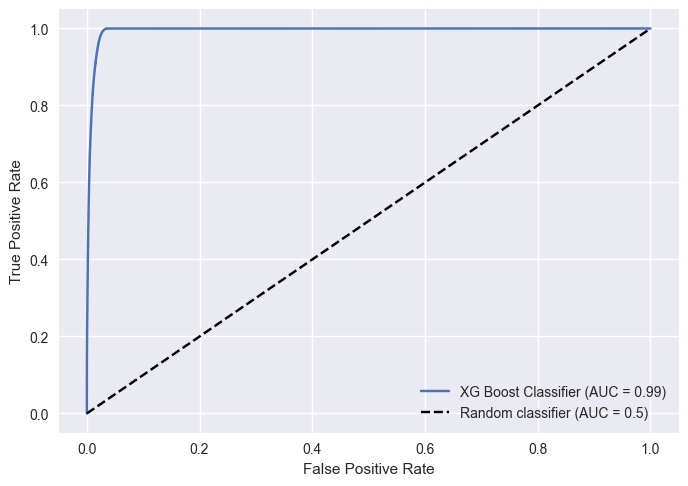

In [36]:
fpr,tpr,_=roc_curve(y_test,model.predict_proba(x_test_preprocessed)[:,1])
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_score,estimator_name='XG Boost Classifier').plot();
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier (AUC = 0.5)') 
plt.legend()
plt.show()

#### Final ML Pipeline

In [37]:
# Custom transformer to remove columns with more than a certain percentage of NaN values
class NanColumnsRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.7):
        self.threshold = threshold
        self.columns_to_drop = []

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        # Calculate the percentage of NaN values for each column
        nan_percentage = round(X.isnull().sum()/X.shape[0],3)
        # Identify columns to drop based on the threshold
        self.columns_to_drop = nan_percentage[nan_percentage > self.threshold].index.tolist()
        return self

    def transform(self, X):
        # Drop the identified columns
        return X.drop(self.columns_to_drop, axis=1)
    
# Custom transformer to remove columns with multicollinearity above a given threshold
class MultiColinearityRemover(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.8):
        self.threshold = threshold
        self.columns_to_drop = []

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        abs_corr_matrix = X.corr().abs()
        # Create a set to store columns that should be removed
        columns_to_remove = set()
        # Iterate over the upper triangle of the correlation matrix
        for i in range(len(abs_corr_matrix.columns)):
            for j in range(i+1, len(abs_corr_matrix.columns)):
                # If correlation exceeds the threshold, mark one of the columns for removal
                if abs_corr_matrix.iloc[i, j] > self.threshold:
                    col1 = abs_corr_matrix.columns[i]
                    col2 = abs_corr_matrix.columns[j]
                    # Add the second column to the removal set
                    columns_to_remove.add(col1)
        self.columns_to_drop = list(columns_to_remove)
        return self

    def transform(self, X):
        # Drop the identified columns
        return X.drop(self.columns_to_drop, axis=1)

In [38]:
x_train=pd.read_csv('./Train/X_Train_Data_Input.csv',index_col='ID')
y_train=pd.read_csv('./Train/Y_Train_Data_Target.csv',index_col='ID')

In [39]:
pipe=Pipeline([
    ('multicollinearity', MultiColinearityRemover(threshold=0.8)),
    ('nan', NanColumnsRemover(threshold=0.5)),
    ('imputation', ColumnTransformer([
        ('frequent', SimpleImputer(strategy='most_frequent'), ['Column0']),
        ('mean', SimpleImputer(strategy='mean'), ['Column4', 'Column5', 'Column6', 'Column8', 'Column14', 'Column15'])
    ], remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False).set_output(transform='pandas')),
    ('scaling', ColumnTransformer([
        ('std', StandardScaler(), ['Column1', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column14', 'Column15']),
        ('ordinal', OrdinalEncoder(), ['Column0'])
    ], remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False).set_output(transform='pandas')),
    ('model', XGBClassifier(subsample=0.8, reg_lambda=1.5, reg_alpha=0.1, n_estimators=1000, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0, colsample_bytree=0.8, random_state=42))
])
pipe.fit(x_train,y_train.values.ravel())

Pipeline(steps=[('multicollinearity', MultiColinearityRemover()),
                ('nan', NanColumnsRemover(threshold=0.5)),
                ('imputation',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('frequent',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Column0']),
                                                 ('mean', SimpleImputer(),
                                                  ['Column4', 'Column5',
                                                   'Column6', 'Column8',
                                                   'Column14', 'Column15'])],
                                   verbose_fe...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

### Saving the ML model

In [40]:
def save_model(pipe:Pipeline,directory: str,filename:str):
    if not os.path.exists(directory):
        os.makedirs(directory)
    file_path = os.path.join(directory, filename)
    joblib.dump(pipe,file_path)
    print(f'The model saved as {filename} sucessfully in {directory} directory.')

In [41]:
save_model(pipe,'model','model.pkl')

The model saved as model.pkl sucessfully in model directory.


### Loading the ML model

In [42]:
class Model:
    def __init__(self, file_path: str):
        self.model=joblib.load(file_path)
    
    def predict(self, X: pd.DataFrame):
        return self.model.predict(X)
    
    def predict_proba(self, X: pd.DataFrame):
        return self.model.predict_proba(X)

    def metrics(self, X: pd.DataFrame, y: pd.Series):
        y_true=y.values.ravel()
        y_predict = self.predict(X)
        y_proba = self.predict_proba(X)[:, 1]
        
        accuracy = accuracy_score(y_true, y_predict)
        recall = recall_score(y_true, y_predict)
        precision = precision_score(y_true, y_predict)
        f1= f1_score(y_true, y_predict)
        roc = roc_auc_score(y_true, y_proba)
        
        print(f'Accuracy Score: {accuracy:.3f}')
        print(f'Recall Score: {recall:.3f}')
        print(f'Precision Score: {precision:.3f}')
        print(f'F1 Score: {f1:.3f}')
        print(f'ROC AUC Score: {roc:.5f}')

In [43]:
x_test=pd.read_csv('./Test/X_Test_Data_Input.csv',index_col='ID')
y_test=pd.read_csv('./Test/Y_Test_Data_Target.csv',index_col='ID')

model=Model('./model/model.pkl')
model.metrics(x_test,y_test)

Accuracy Score: 0.978
Recall Score: 0.944
Precision Score: 0.841
F1 Score: 0.890
ROC AUC Score: 0.99477
